In [1]:
import torchvision.transforms as transforms
from vqaX_sample import VQAXEvalDataset, load_trained
import torch
from argparse import Namespace
from PIL import Image
import numpy as np

/home/simeon/.anaconda/envs/nlxgpt/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
args = Namespace(
    ckpt_path = 'ckpts/',
    device = 'cpu',
    load_from_epoch = 11,
    img_size = 224,
    nle_data_val_path = 'nle_data/VQA-X/vqaX_val.json',
    nle_data_test_path = 'nle_data/VQA-X/vqaX_test.json',
    split = 'val',
    max_seq_len = 20,
    eval_batch_size = 1,
    image_dir = '/home/simeon/Dokumente/Datasets/COCO/'
)

In [3]:
tokenizer, _ = load_trained(
    args.ckpt_path, args.load_from_epoch, args.device)
print("Model Setup Ready...")

Model Setup Ready...


In [4]:
# TODO add greyscale
img_transform = transforms.Compose([transforms.Resize((args.img_size, args.img_size)),
                                    transforms.Grayscale(num_output_channels=3), # transform to grayscale
                                    transforms.ToTensor(),
                                    # commented out normalization in order to display the image:
                                    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                    ])

In [5]:
annot_path = args.nle_data_test_path if args.split == 'test' else args.nle_data_val_path
test_dataset = VQAXEvalDataset(path=annot_path,
                               transform=img_transform,
                               tokenizer=tokenizer,
                               max_seq_len=args.max_seq_len,
                               image_dir=args.image_dir)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=args.eval_batch_size,
                                          shuffle=False,
                                          pin_memory=True)

In [6]:
def display_img_tensor(tensor): 
    img_array = tensor.numpy().squeeze(0).transpose(1,2,0) * 255
    img_array = img_array.astype(np.uint8)
    display(Image.fromarray(img_array))

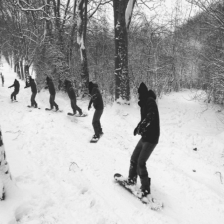

['does this appear to be a photo of multiple exposures of the black clad snowboarder<|endoftext|> the answer is']



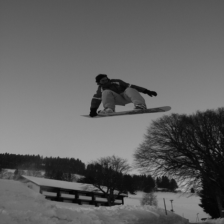

['is this a beach scene<|endoftext|> the answer is']



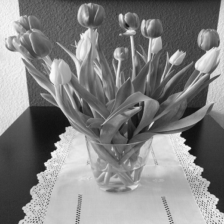

['what kind of flowers are in the vase<|endoftext|> the answer is']



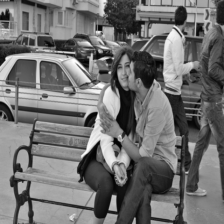

['is it raining<|endoftext|> the answer is']



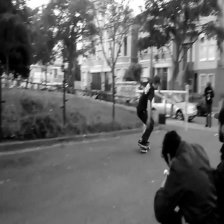

['what is the man in the hat doing<|endoftext|> the answer is']



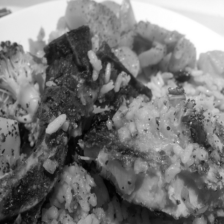

['is rice part of this meal<|endoftext|> the answer is']



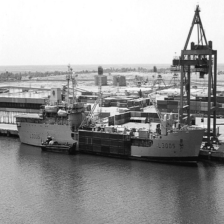

['is this a leisure boat<|endoftext|> the answer is']



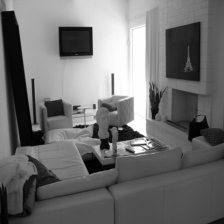

['what room is this<|endoftext|> the answer is']



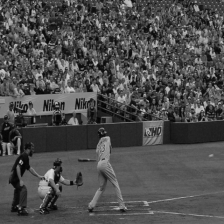

['what are they playing<|endoftext|> the answer is']



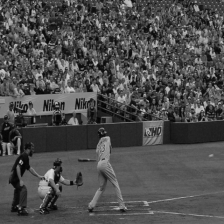

['what sport is this<|endoftext|> the answer is']



In [7]:
loader = test_loader
limit = 10

for i, batch in enumerate(loader):
    
    if i == limit: 
        break
    
    current_output = []
    batch = tuple(input_tensor.to(args.device) for input_tensor in batch)
    img, img_id, input_ids, segment_ids = batch
    
    display_img_tensor(img)
    print(tokenizer.batch_decode(input_ids), end='\n\n')